<h1>Trabalho de Álgebra linear - Regressão - Naval Propulsion 2<h1>
<ul>Equipe:
    <li>Guilherme Gomes Botelho</li>
    <li>Pedro Kauaii Mesquita Moura Andrade</li>
    <li>Lucas Azevedo de Oliveira</li>
    <li>Eduardo Cavalcante Matias</li>
    </ul>

In [100]:
#Importando bibliotecas do python
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [101]:
#Criando uma matriz baseada no banco de dados
columns_names=['Lever position (lp) [ ]',
               'Ship speed (v) [knots]',
               'Gas Turbine shaft torque (GTT) [kN m]',
               'Gas Turbine rate of revolutions (GTn) [rpm]',
               'Gas Generator rate of revolutions (GGn) [rpm]',
               'Starboard Propeller Torque (Ts) [kN]',
               'Port Propeller Torque (Tp) [kN]',
               'HP Turbine exit temperature (T48) [C]',
               'GT Compressor inlet air temperature (T1) [C]',
               'GT Compressor outlet air temperature (T2) [C]',
               'HP Turbine exit pressure (P48) [bar]',
               'GT Compressor inlet air pressure (P1) [bar]',
               'GT Compressor outlet air pressure (P2) [bar]',
               'Gas Turbine exhaust gas pressure (Pexh) [bar]',
               'Turbine Injecton Control (TIC) [%]',
               'Fuel flow (mf) [kg/s]',
               'GT Compressor decay state coefficient.',
               'GT Turbine decay state coefficient.']
test = pd.read_csv('C:\\Users\\Guilherme\\OneDrive\\Área de Trabalho\\data.txt', names = columns_names, delim_whitespace=True)
print('Posto da matriz =',np.linalg.matrix_rank(test))
test

Posto da matriz = 16


,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15.0,21624.934,1924.342,8470.013,175.239,175.239,681.658,288.0,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18.0,29763.213,2306.745,8800.352,245.954,245.954,747.405,288.0,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21.0,39003.867,2678.052,9120.889,332.389,332.389,796.457,288.0,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24.0,50992.579,3087.434,9300.274,438.024,438.024,892.945,288.0,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


Como o posto da matriz é menor qua a quantidade colunas, a matriz tem colunas Linearmente Dependentes(L.D.).
Para a realização da decomposição QR, é necessário tirar as colunas L.D..

Na célula a seguir é feito esse processo.

In [102]:
test.drop(labels="Port Propeller Torque (Tp) [kN]", axis=1, inplace=True)
test.drop(labels="GT Compressor inlet air temperature (T1) [C]", axis=1, inplace=True)
test.drop(labels="GT Compressor inlet air pressure (P1) [bar]", axis=1, inplace=True)
test.drop(labels="GT Compressor decay state coefficient.", axis=1, inplace=True)

Em seguida, a matriz principal é dividida em matriz (X) de teste(30% da matriz original) e  de treinamento(70%). 
Ainda, a coluna "GT Turbine decay state coefficient" é passada para um vetor (y), este também sendo
separado em teste e treinamento, na mesma proporção.

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    test.drop(labels="GT Turbine decay state coefficient.", axis=1), 
    test["GT Turbine decay state coefficient."], 
    test_size=0.3, 
    random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('Posto da matriz de treinamento = ',np.linalg.matrix_rank(X_train),
      '; Posto da matriz de teste = ',np.linalg.matrix_rank(X_test))

(8353, 13) (3581, 13) (8353,) (3581,)
Posto da matriz de treinamento =  13 ; Posto da matriz de teste =  13


In [104]:
X_train

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],HP Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s]
9653,6.175,18.0,29761.608,2306.844,8790.141,246.015,772.240,665.084,2.515,13.347,1.030,34.254,0.678
2269,2.088,6.0,3152.420,1352.095,6838.435,23.699,517.051,561.454,1.206,6.466,1.019,16.754,0.156
11461,5.140,15.0,21625.519,1924.342,8471.841,175.228,682.640,629.418,2.087,10.987,1.027,23.849,0.472
9349,8.206,24.0,50993.086,3087.459,9305.741,437.978,901.076,725.535,3.586,18.272,1.042,58.585,1.160
5427,1.138,3.0,748.284,1351.846,6642.099,7.624,468.577,548.091,1.115,6.029,1.019,8.163,0.093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,8.206,24.0,50989.676,3087.293,9292.800,437.925,915.018,725.973,3.607,18.693,1.042,60.083,1.189
5191,8.206,24.0,50993.686,3087.472,9306.729,438.021,933.160,734.056,3.589,18.621,1.041,61.190,1.211
5390,9.300,27.0,72759.686,3560.371,9751.200,644.872,1089.292,780.775,4.526,22.961,1.050,90.760,1.797
860,6.175,18.0,29797.053,2307.255,8842.649,246.362,779.989,671.876,2.497,13.129,1.030,34.453,0.682


In [105]:
X_test

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],HP Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s]
10172,3.144,9.0,8375.164,1386.735,7045.840,60.311,576.879,576.548,1.392,7.506,1.021,11.961,0.237
10322,9.300,27.0,72757.002,3560.349,9728.709,644.795,1064.615,773.249,4.550,23.045,1.051,88.928,1.760
9195,7.148,21.0,39005.631,2678.023,9117.010,332.339,821.362,686.661,2.986,15.687,1.036,43.923,0.870
357,7.148,21.0,38977.552,2678.076,9138.462,332.109,840.619,697.393,2.956,15.460,1.035,44.791,0.887
4352,6.175,18.0,29792.145,2307.399,8824.273,246.206,774.265,668.631,2.503,13.185,1.030,34.208,0.677
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8850,4.161,12.0,14720.113,1547.457,7750.305,113.746,626.224,602.446,1.661,8.853,1.023,16.547,0.328
976,5.140,15.0,21635.910,1924.318,8494.519,175.307,725.337,643.888,2.079,11.157,1.026,26.049,0.516
5800,5.140,15.0,21632.130,1924.339,8489.766,175.263,699.358,636.038,2.080,11.006,1.026,24.682,0.489
8885,3.144,9.0,8377.261,1386.746,7091.791,60.337,569.364,575.939,1.390,7.410,1.021,11.629,0.230


Nesta etapa, adiciona-se uma coluna de 1's nas matrizes (X) de teste e de treinamento para a realização da decomposição QR.

In [106]:
X_train['1']= 1
X_test['1']= 1
print('Posto da matriz de treinamento = ',np.linalg.matrix_rank(X_train),
      '; Posto da matriz de teste = ',np.linalg.matrix_rank(X_test))

Posto da matriz de treinamento =  14 ; Posto da matriz de teste =  14


A partir de agora, começa a realização da decomposição QR e o processo de estimatativa.

In [107]:
#Decomposição QR
Q, R = np.linalg.qr(X_train)

In [108]:
#Cálculo do vetor de coeficientes
coef_vetor = np.linalg.solve(R, np.dot(Q.T, y_train))
print(coef_vetor)

[-7.41820730e-04  6.43829005e-03  1.39879490e-05  6.57503453e-05
  3.15760434e-05 -1.59389835e-03 -6.87910346e-04  1.90079657e-04
  8.08087958e-02 -5.37712513e-02  8.67957186e-01 -2.32902076e-04
  3.59516295e-01  2.06901946e-01]


In [109]:
#Cálculo das estimativas
predicted_test = np.dot(X_test, coef_vetor)
predicted_train = np.dot(X_train, coef_vetor)

Gráficos das estimativas de treinamento e de teste, respectivamente:

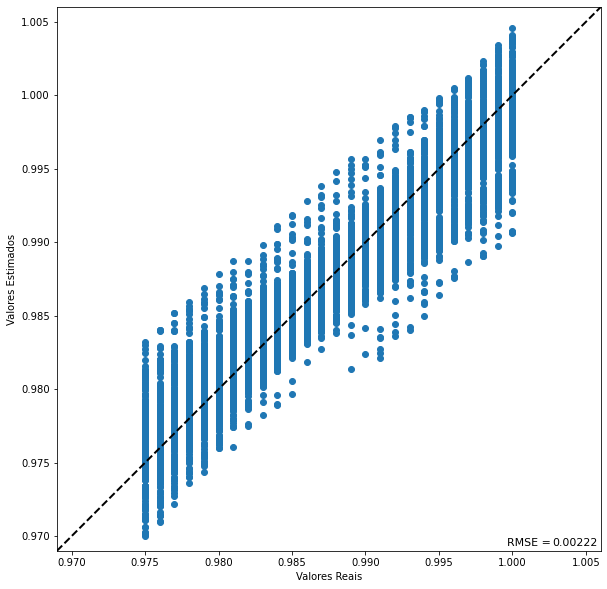

In [110]:
plt.rcParams["figure.figsize"] = (10,10)
plt.axis('square')
plt.scatter(y_train, predicted_train)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Estimados')
plt.autoscale(tight = True)
xpoints = ypoints = [0.969, 1.006]
plt.plot(xpoints, ypoints, linestyle='dashed', color='black', lw=2, scalex=False, scaley=False)
rmse = msef(y_train, predicted_train, squared=False)
plt.text(1.0027, 0.9693, "{0:.5f}".format(round(rmse,5)), size = 11, color = 'black')
plt.text(0.9996, 0.9693, 'RMSE = ', size = 11, color = 'black')
plt.show()

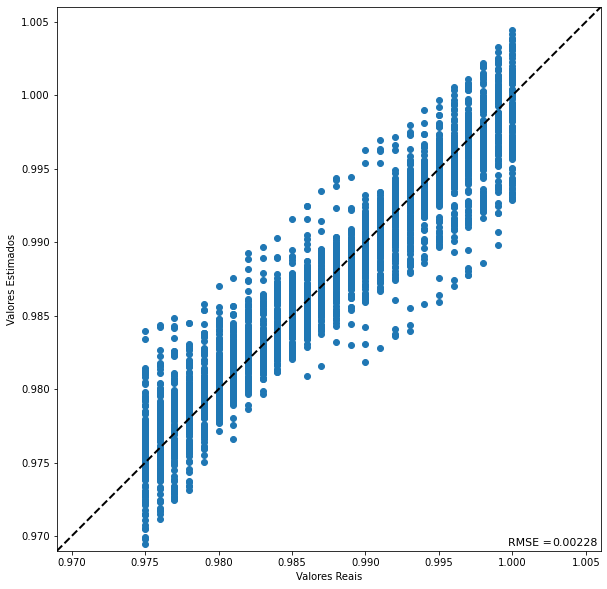

In [111]:
plt.rcParams["figure.figsize"] = (10,10)
plt.axis('square')
plt.scatter(y_test, predicted_test)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Estimados')
plt.autoscale(tight = True)
xpoints = ypoints = [0.969, 1.006]
plt.plot(xpoints, ypoints, linestyle='dashed', color='black', lw=2, scalex=False, scaley=False)
rmse = msef(y_test, predicted_test, squared=False)
plt.text(1.0027, 0.9693, "{0:.5f}".format(round(rmse,5)), size = 11, color = 'black')
plt.text(0.9997, 0.9693, 'RMSE = ', size = 11, color = 'black')
plt.show()

Questão.5 - Verificar numericamente que $Q^TQ$ $\approx$ $I$, para o respectivo banco de dados.

Solução: Cria-se uma matriz $M$ resultante da multiplicação $Q^T \cdot Q$ e, em seguida, calcula-se o valor máximo do valor absoluto da subtração da identidade por $M$. Assim, concluí-se que o valor máximo obtido é muito pequeno e, portanto, aproximadamente 0. Logo, $Q^TQ \approx I$.

In [69]:
M = np.dot(Q.T, Q)
iden = np.identity(len(M))
max_value = np.max(abs(iden - M))
max_value

1.3322676295501878e-15

Questão.6 - Verificar numericamente que $QQ^T \not\approx I$, para o respectivo banco de dados.

Solução: Cria-se uma matriz $N$ resultante da multiplicação $Q \cdot Q^T$ e, em seguida, calcula-se o valor máximo do valor absoluto da subtração da identidade por $N$. Assim, pode-se perceber que o valor máximo é consideravelmente elevado e, portanto, não é próximo de 0. Logo, $QQ^T \not\approx I$.

In [68]:
N = np.dot(Q, Q.T)
iden = np.identity(len(N))
max_value = np.max(abs(iden - N))
max_value

0.9992890650730578